<h1><center>Data Science for Covid19</center></h1>
<center>Intelligent Systems For Bioinformatics</center>

For this workflow it will be necessary import the following packages:

In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

import os
import warnings
warnings.filterwarnings('ignore') 
import pickle

try:
    os.mkdir("plots")
    print("Folder 'plots' successfully created.")
except:
    print("Folder 'plots' already exists.")
    
try:
    os.mkdir("data")
    print("Folder 'data' successfully created.")
except:
    print("Folder 'data' already exists.")
    
try:
    os.mkdir("models")
    print("Folder 'models' successfully created.")
except:
    print("Folder 'models' already exists.")
    
seed = 123
np.random.seed(seed)

Folder 'plots' already exists.
Folder 'data' already exists.
Folder 'models' successfully created.


The dataset "Covid_Dataset.csv" contains a total of 20 symptoms and individual's routines that are possibly related to Covid-19 and were evaluated for 5434 individuals. The last feature of the dataset, "COVID-19", reports the presence of the virus.

In [278]:
dataset = pd.read_csv("Covid_Dataset.csv")
dataset

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [279]:
print("Number of samples: " + str(dataset.shape[0]))
print("Number of features: " + str(dataset.shape[1]))
print("Number of NAs: " + str(sum(dataset.isna().sum())))

Number of samples: 5434
Number of features: 21
Number of NAs: 0


### **Exploratory analysis**

The features evaluated for all the individuals include several symptoms such as breathing problems, fever and dry cough and routines such as travel abroad, contact with Covid-19 patients and attending large gatherings.

To better comprehend the dataset, we perform an exploratory analysis that begun by searching for missing data that could condition our analysis. We verified that all the 5 434 individuals have answered to the requested information.

In [280]:
dataset.isna().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

When attempting to a better description of all the features, we found that no one has reported the use of mask or sanitization from markets which can introduce bias to the model. To ensure that does not happen, we remove those routines from the dataset.

In [281]:
dataset.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [282]:
for col in dataset.columns:
    if len(dataset[col].unique())==1:
        print(col)
        print(dataset[col].unique())
        print()

Wearing Masks
['No']

Sanitization from Market
['No']



In [283]:
dataset = dataset.drop(['Wearing Masks',"Sanitization from Market"], axis=1)
dataset

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No


In [284]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            plot.annotate(percentage, (x, y), size = 17, xytext=(0,3),
                    textcoords="offset pixels", ha='left', fontweight='bold')

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 17, xytext=(20,10),
                    textcoords="offset pixels", ha='center', fontweight='bold')


Regarding the presence of Covid-19, approximately 81% of the 5 434 surveyed were Covid-19 positive.

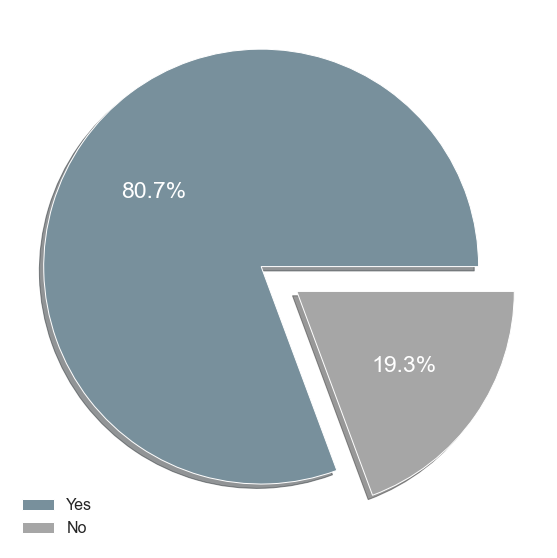

In [285]:
fig, ax = plt.subplots(figsize=(10, 10))

covid = dataset["COVID-19"].value_counts()
ax.pie(covid, explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#78909C", "#A6A6A6"],
       textprops={'fontsize': 23, 'color':"white"})
ax.legend(labels=covid.index, frameon=False, title_fontsize=16, fontsize=16)

plt.savefig(os.path.join('plots/COVID-19_pie.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


#### **Symptoms**

We decided to evaluate if the number of positive cases is higher when some symptoms are reported, such as fever, dry cough, fatigue and difficulty breathing which are pointed by WHO (https://www.who.int/health-topics/coronavirus#tab=tab_3v) as related to Covid-19. The resulting plots are shown below.

For the samples that reported breathing problems, approximately 93% have tested positive for Covid-19. Nonetheless, almost 56% of those who not report that symptom were also Covid-19 positive.

Of all the samples that reported fever, nearly 88% were Covid-19 positive and for those who did not, the number of Covid-19 positive rounded 54%.

90% of the individuals that reported Dry Cough were positive for Covid-19 and approximately 45% of those who did not were also Covid-19.

For the last symptom, Fatigue, 79% of the samples that have reported it were Covid-19 positive but almost 83% of the ones that do not were also positive for Covid-19.

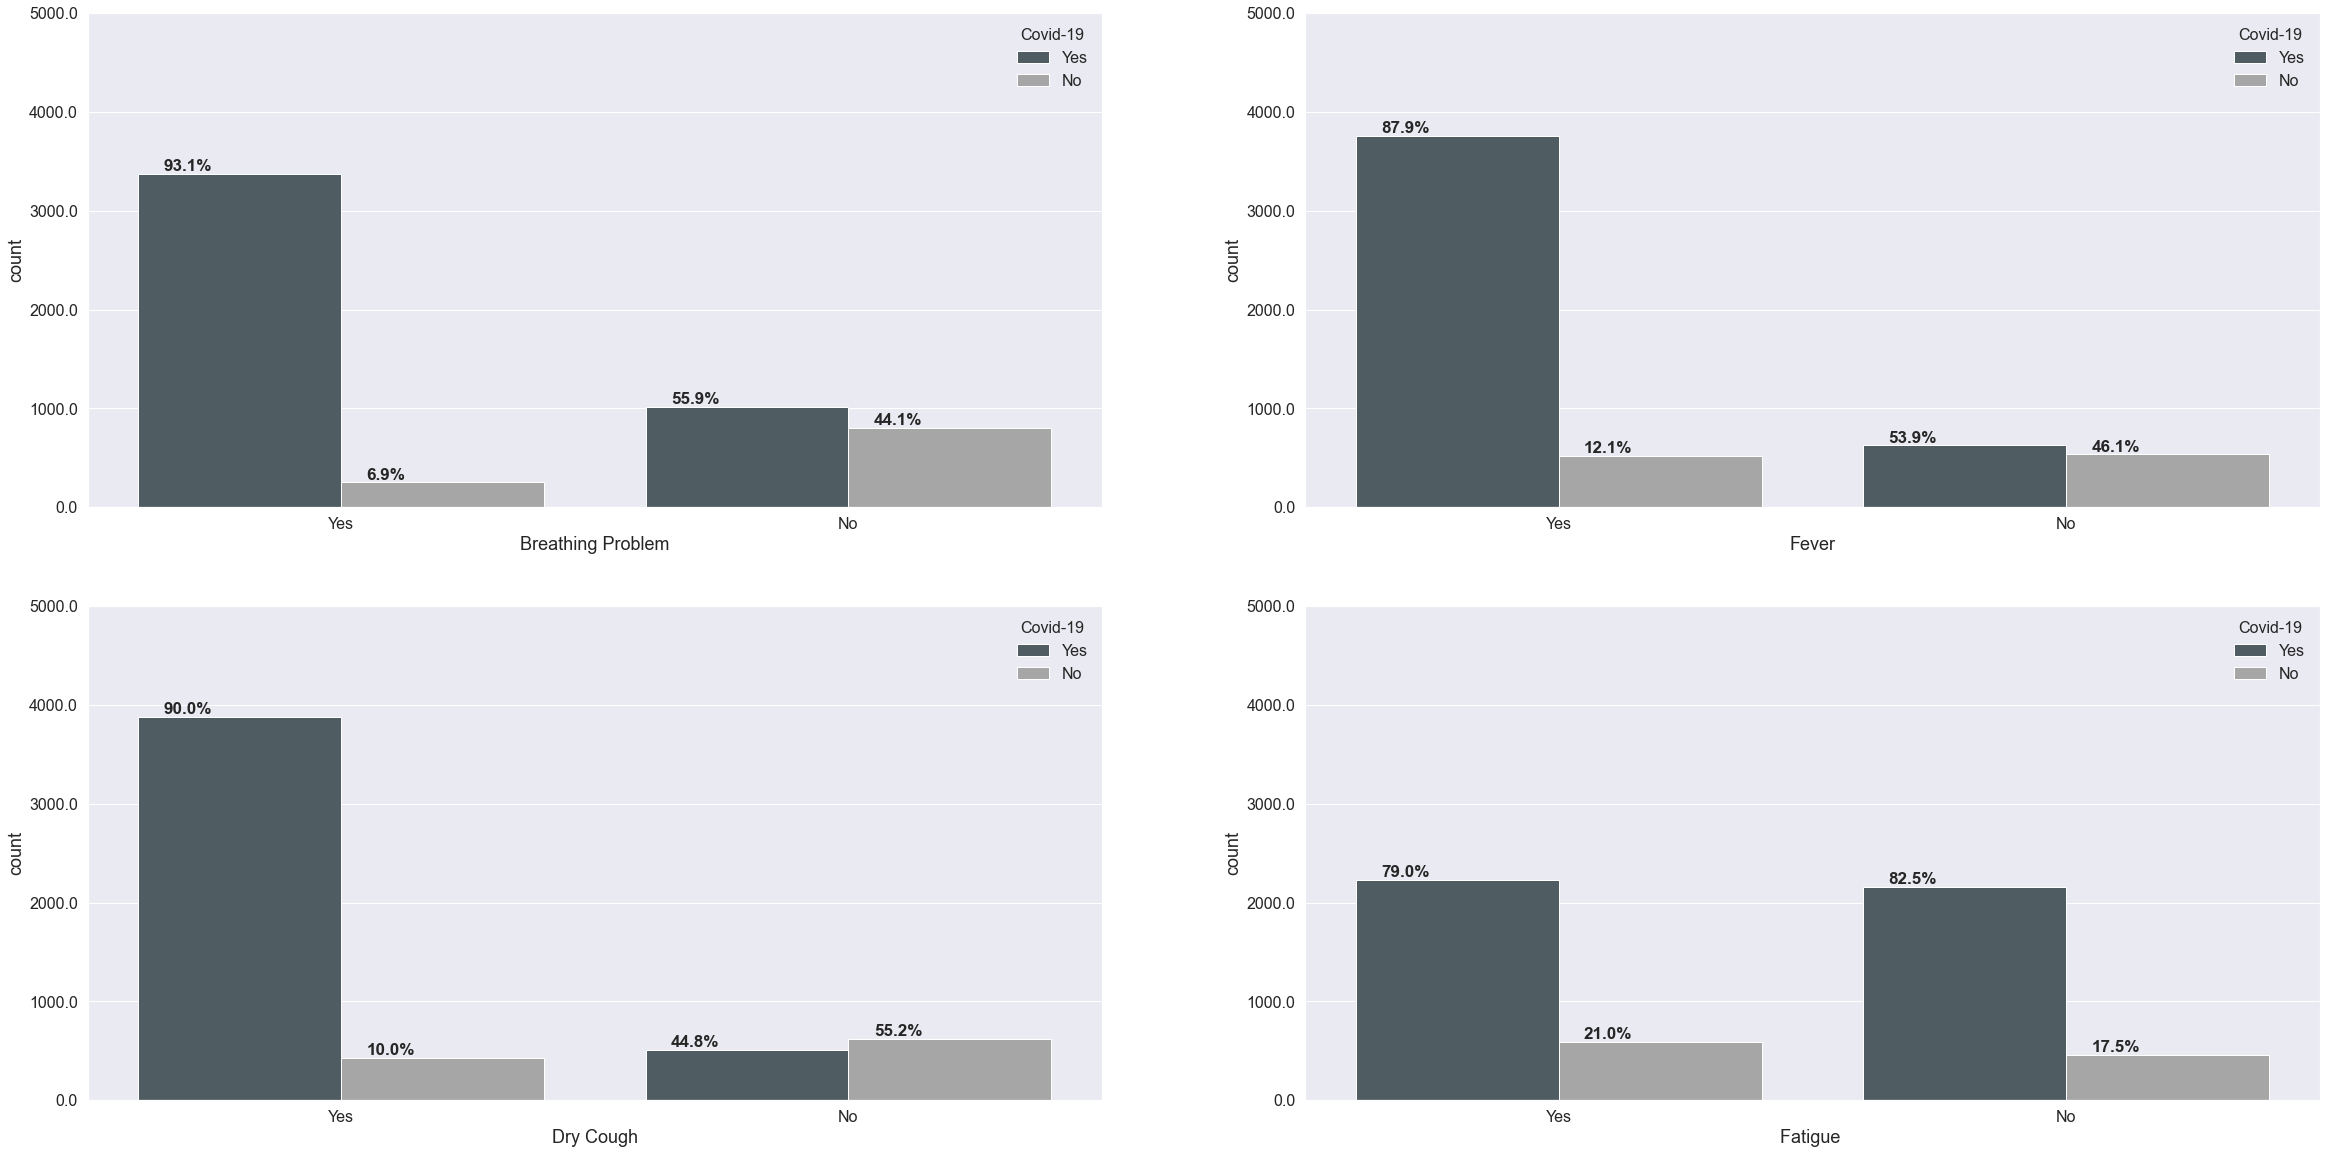

In [286]:
palette = ["#4C5E66", "#A6A6A6"]

sns.set_style()
sns.set_palette(palette)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(40,20))

Dry_Cough_plt = sns.countplot(x='Breathing Problem',hue='COVID-19',data=dataset, ax=ax1)
Dry_Cough_plt.set_ylim(0,5000)
Dry_Cough_plt.legend(title = "Covid-19", frameon=False, title_fontsize=16, fontsize=16)
Dry_Cough_plt.set_xticklabels(Dry_Cough_plt.get_xticklabels(), fontsize = 16)
Dry_Cough_plt.set_yticklabels(Dry_Cough_plt.get_yticks(), fontsize = 16)
Dry_Cough_plt.set_xlabel(Dry_Cough_plt.get_xlabel(), fontsize = 18)
Dry_Cough_plt.set_ylabel(Dry_Cough_plt.get_ylabel(), fontsize = 18)
with_hue(Dry_Cough_plt,dataset['Breathing Problem'],2,2)

Fever_plot = sns.countplot(x='Fever',hue='COVID-19',data=dataset, ax=ax2)
Fever_plot.set_ylim(0,5000)
Fever_plot.legend(title = "Covid-19", frameon=False, title_fontsize=16, fontsize=16)
Fever_plot.set_xticklabels(Fever_plot.get_xticklabels(), fontsize = 16)
Fever_plot.set_yticklabels(Fever_plot.get_yticks(), fontsize = 16)
Fever_plot.set_xlabel(Fever_plot.get_xlabel(), fontsize = 18)
Fever_plot.set_ylabel(Fever_plot.get_ylabel(), fontsize = 18)
with_hue(Fever_plot,dataset['Fever'],2,2)

Dry_Cough_plt = sns.countplot(x='Dry Cough',hue='COVID-19',data=dataset, ax=ax3)
Dry_Cough_plt.set_ylim(0,5000)
Dry_Cough_plt.legend(title = "Covid-19", frameon=False, title_fontsize=16, fontsize=16)
Dry_Cough_plt.set_xticklabels(Dry_Cough_plt.get_xticklabels(), fontsize = 16)
Dry_Cough_plt.set_yticklabels(Dry_Cough_plt.get_yticks(), fontsize = 16)
Dry_Cough_plt.set_xlabel(Dry_Cough_plt.get_xlabel(), fontsize = 18)
Dry_Cough_plt.set_ylabel(Dry_Cough_plt.get_ylabel(), fontsize = 18)
with_hue(Dry_Cough_plt,dataset['Dry Cough'],2,2)

Fever_plot = sns.countplot(x='Fatigue ',hue='COVID-19',data=dataset, ax=ax4)
Fever_plot.set_ylim(0,5000)
Fever_plot.legend(title = "Covid-19", frameon=False, title_fontsize=16, fontsize=16)
Fever_plot.set_xticklabels(Fever_plot.get_xticklabels(), fontsize = 16)
Fever_plot.set_yticklabels(Fever_plot.get_yticks(), fontsize = 16)
Fever_plot.set_xlabel(Fever_plot.get_xlabel(), fontsize = 18)
Fever_plot.set_ylabel(Fever_plot.get_ylabel(), fontsize = 18)
with_hue(Fever_plot,dataset['Fatigue '],2,2)

plt.savefig(os.path.join('plots/sintomas.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


#### **Routines**

Similarly to the symptoms, we perform an exploratory analysis for some of the individuals daily routines, as shown below.

Covid-19 is highly contagious, thus, there is a great chance of contracting the virus when contact with confirmed cases of Covid-19. Almost 95% of the samples that have had contact with confirmed cases of Covid-19 were further confirmed as Covid-19 positive. Although, around 67% of the samples that have not contacted with confirmed cases were also positive.

Public exposed places can also be highly contagious and for those who have visited such places, approximately 85% were positive for Covid-19. Still, those who did not have frequented public exposed places, around 76% were, also, Covid-19 positive.

The number of positive cases was around 97% for those who attended large gatherings and about 66% for those who did not.

Lastly, all the samples that reported to have travelled abroad were positive for Covid-19, but almost 65% of the ones who did not were also positive.


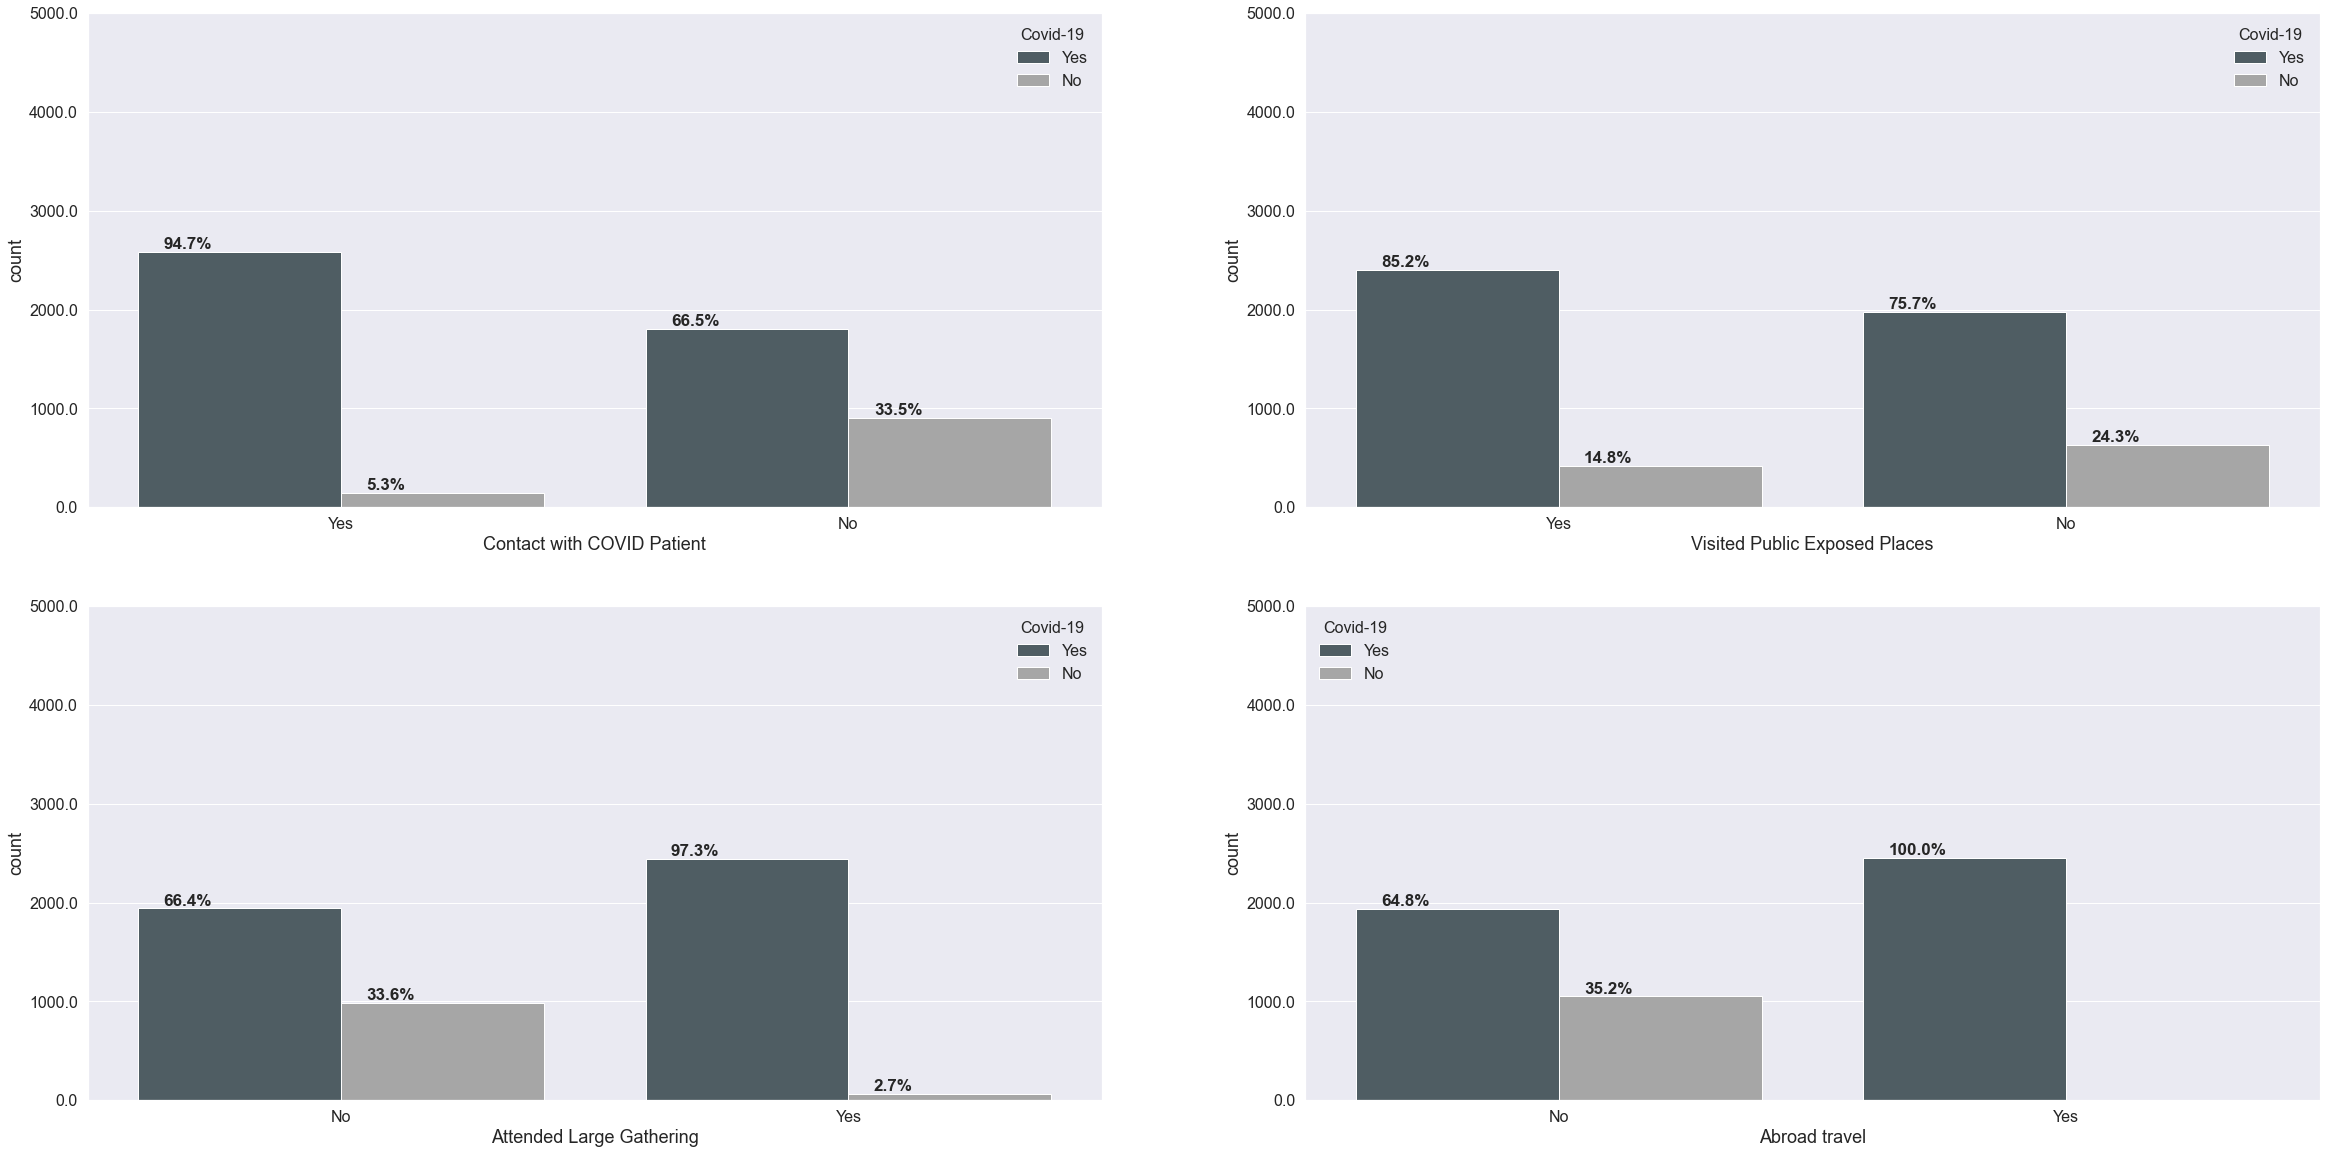

In [287]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(40,20))

Contact_routine = sns.countplot(x='Contact with COVID Patient',hue='COVID-19',data=dataset, ax=ax1)
Contact_routine.set_ylim(0,5000)
Contact_routine.legend(title = "Covid-19", frameon=False, title_fontsize=16, fontsize=16)
Contact_routine.set_xticklabels(Contact_routine.get_xticklabels(), fontsize = 16)
Contact_routine.set_yticklabels(Contact_routine.get_yticks(), fontsize = 16)
Contact_routine.set_xlabel(Contact_routine.get_xlabel(), fontsize = 18)
Contact_routine.set_ylabel(Contact_routine.get_ylabel(), fontsize = 18)
with_hue(Contact_routine,dataset['Contact with COVID Patient'],2,2)

Family_routine = sns.countplot(x='Visited Public Exposed Places',hue='COVID-19',data=dataset, ax=ax2)
Family_routine.set_ylim(0,5000)
Family_routine.legend(title = "Covid-19", frameon=False, title_fontsize=16, fontsize=16)
Family_routine.set_xticklabels(Family_routine.get_xticklabels(), fontsize = 16)
Family_routine.set_yticklabels(Family_routine.get_yticks(), fontsize = 16)
Family_routine.set_xlabel(Family_routine.get_xlabel(), fontsize = 18)
Family_routine.set_ylabel(Family_routine.get_ylabel(), fontsize = 18)
with_hue(Family_routine,dataset['Visited Public Exposed Places'],2,2)

Gathering_routine = sns.countplot(x='Attended Large Gathering',hue='COVID-19',data=dataset, ax=ax3)
Gathering_routine.set_ylim(0,5000)
Gathering_routine.legend(title = "Covid-19", frameon=False, title_fontsize=16, fontsize=16)
Gathering_routine.set_xticklabels(Gathering_routine.get_xticklabels(), fontsize = 16)
Gathering_routine.set_yticklabels(Gathering_routine.get_yticks(), fontsize = 16)
Gathering_routine.set_xlabel(Gathering_routine.get_xlabel(), fontsize = 18)
Gathering_routine.set_ylabel(Gathering_routine.get_ylabel(), fontsize = 18)
with_hue(Gathering_routine,dataset['Attended Large Gathering'],2,2)

Travel_routine = sns.countplot(x='Abroad travel',hue='COVID-19',data=dataset, ax=ax4)
Travel_routine.set_ylim(0,5000)
Travel_routine.legend(title = "Covid-19", frameon=False, title_fontsize=16, fontsize=16)
Travel_routine.set_xticklabels(Travel_routine.get_xticklabels(), fontsize = 16)
Travel_routine.set_yticklabels(Travel_routine.get_yticks(), fontsize = 16)
Travel_routine.set_xlabel(Travel_routine.get_xlabel(), fontsize = 18)
Travel_routine.set_ylabel(Travel_routine.get_ylabel(), fontsize = 18)
with_hue(Travel_routine,dataset['Abroad travel'],2,2)

plt.savefig(os.path.join('plots/rotinas.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


Once the variables were all "Yes" or "No", we transform the variables into binary using LabelEncoder from ScikitLearn.

In [288]:
dataset = dataset.apply(preprocessing.LabelEncoder().fit_transform)
dataset

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0


To complete the exploratory analysis of the dataset, a correlation map revealed that symptoms such breathing problems, sore throat and dry cough and routines such travel abroad, contact with Covid-19 patients and attending large gatherings are highly correlated to the presence of Covid-19, as noted below.

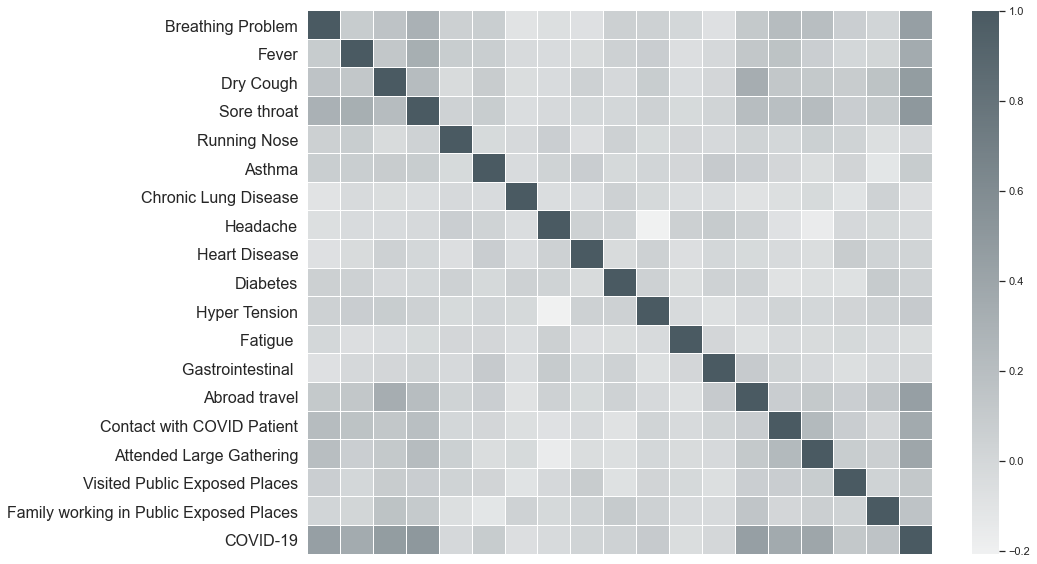

In [417]:
fig, ax = plt.subplots(1, 1, figsize=(14,10))

cmap = sns.light_palette("#4A5A62", as_cmap=True)
heatmap = sns.heatmap(dataset.corr(), cmap=cmap, linewidths=0.01, ax=ax)
heatmap.set_xticklabels("", fontsize = 16)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize = 16)

plt.savefig(os.path.join('plots/heatmap.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


For our Machine Learning approach, we begin by separating the input variables (X) from the output variable (y). Furthermore we split the variables into training and test sets, representing, respectively, 80% and 20% of the total dataset samples.

In [304]:
X = dataset.drop('COVID-19', axis=1)
y = dataset['COVID-19'].values

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4347, 18)
(1087, 18)
(4347,)
(1087,)


The complexity of the model increases with the increasing number of features, which can lead to the occurrence of overfitting. This happens when the model fits too well to the training dataset, but then cannot generalize to new examples that the model has never seen during training. In order to avoid this problem we can choose to reduce the number of features, in this case we used the SelectKBest class that selects the k features with best score based on univariate statistical tests.

In [374]:
KBest_selector = SelectKBest(f_regression)

### Random Forest 

For the first approach, we used the Random Forest (RF) algorithm with the scikit Learn RandomForestClassifier class as estimator.

In [375]:
RF_estimator =  RandomForestClassifier()
estimator

GradientBoostingClassifier()

The Pipeline class is used to chain a series of processing that is done to the data. In this case, the selection of the k best features using the selector estimator defined above and the model estimator itself.

In [376]:
RF_pipeline = Pipeline([('selector', KBest_selector),('estimator',RF_estimator)])

Then several hyperparameters were tested using the RandomizedSearchCV optimization method, which tests some random combinations of the search grid values, evaluating performance through cross-validation (3 folds). After defining the hyperparameter grid and the respective values to be tested, the best ones were chosen for the future construction of the model.

In [377]:
RF_params_to_test = {'estimator__n_estimators':[100, 200, 500, 700, 1000],'selector__k':[5, 10, 15, 'all']}

RF_randomized_search = RandomizedSearchCV(RF_pipeline,RF_params_to_test, cv=3)
RF_randomized_search.fit(X,y)

RF_rs_results = pd.DataFrame.from_dict(data=RF_randomized_search.cv_results_)
RF_rs_results.to_csv('data/rs_results(RF).csv',index=False)
RF_rs_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_selector__k,param_estimator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.229673,0.050498,0.209974,0.017851,all,1000,"{'selector__k': 'all', 'estimator__n_estimator...",0.932119,0.908338,0.902816,0.914424,0.012714,6
1,0.170803,0.014363,0.019460,0.000997,10,100,"{'selector__k': 10, 'estimator__n_estimators':...",0.953642,0.908338,0.888459,0.916813,0.027277,2
2,0.369664,0.015438,0.039368,0.000234,10,200,"{'selector__k': 10, 'estimator__n_estimators':...",0.955298,0.897846,0.895638,0.916261,0.027618,4
3,0.879859,0.023408,0.083996,0.003468,5,500,"{'selector__k': 5, 'estimator__n_estimators': ...",0.956954,0.887355,0.717283,0.853864,0.100670,8
4,2.108607,0.032027,0.198462,0.019968,10,1000,"{'selector__k': 10, 'estimator__n_estimators':...",0.960265,0.909442,0.897294,0.922334,0.027276,1
5,0.216127,0.010904,0.021534,0.000647,all,100,"{'selector__k': 'all', 'estimator__n_estimator...",0.937086,0.909442,0.902816,0.916448,0.014842,3
6,1.412553,0.007101,0.139138,0.004633,10,700,"{'selector__k': 10, 'estimator__n_estimators':...",0.953642,0.898399,0.895638,0.915893,0.026717,5
7,1.447150,0.191065,0.130510,0.009345,5,700,"{'selector__k': 5, 'estimator__n_estimators': ...",0.956954,0.887355,0.717283,0.853864,0.100670,8
8,1.057176,0.042529,0.101161,0.004619,15,500,"{'selector__k': 15, 'estimator__n_estimators':...",0.932119,0.904473,0.902816,0.913136,0.013440,7
9,1.869484,0.015601,0.172805,0.005393,5,1000,"{'selector__k': 5, 'estimator__n_estimators': ...",0.956954,0.887355,0.717283,0.853864,0.100670,8


Using the best hyperparameters (selector__k = 10 and estimator__n_estimators = 1000) we build the RF model.

In [378]:
RF_randomized_search.best_params_

{'selector__k': 10, 'estimator__n_estimators': 1000}

In [379]:
RF_best_pipeline = RF_randomized_search.best_estimator_
RF_best_pipeline

Pipeline(steps=[('selector',
                 SelectKBest(score_func=<function f_regression at 0x7fe429241170>)),
                ('estimator', RandomForestClassifier(n_estimators=1000))])

To evaluate the model, we used cross validation with the hyperparameters already optimized. 
For the evaluation different metrics can be used, such as accuracy, recall, precision and area under the curve (AUC).

In [380]:
scoring_metrics = ['accuracy', 'recall', 'precision', 'roc_auc']

In [381]:
RF_cv_scores = cross_validate(RF_best_pipeline, X, y, scoring=scoring_metrics, cv=5, return_train_score=False)

eachfoldRF_accuracy = []
eachfoldRF_recall = []
eachfoldRF_precision = []
eachfoldRF_roc_auc = []

for key, value in RF_cv_scores.items():
    if key != "fit_time" and key != "score_time":
        print("Metrics: %s" % key)
        print("Results for each fold: %s" % value) 
        print("Mean for all folds: %s" % np.mean(value))
        print("Standard deviation: %s" % np.std(value))
        
        if ("eachfoldRF_" + key[5:]=="eachfoldRF_accuracy"):
            eachfoldRF_accuracy = value
        elif ("eachfoldRF_" + key[5:]=="eachfoldRF_recall"):
            eachfoldRF_recall = value
        elif ("eachfoldRF_" + key[5:]=="eachfoldRF_precision"):
            eachfoldRF_precision = value
        elif ("eachfoldRF_" + key[5:]=="eachfoldRF_roc_auc"):
            eachfoldRF_roc_auc = value

Metrics: test_accuracy
Results for each fold: [0.93376265 0.99172033 0.89604416 0.78656854 0.8664825 ]
Mean for all folds: 0.8949156361554008
Standard deviation: 0.06845297626358415
Metrics: test_recall
Results for each fold: [0.995439   1.         0.9281642  0.73744292 0.92694064]
Mean for all folds: 0.917597350869246
Standard deviation: 0.09539820936857259
Metrics: test_precision
Results for each fold: [0.92773645 0.98984199 0.94212963 0.99691358 0.90929451]
Mean for all folds: 0.9531832319589899
Standard deviation: 0.03450260312500119
Metrics: test_roc_auc
Results for each fold: [0.98633871 1.         0.94923169 0.94670411 0.86236682]
Mean for all folds: 0.9489282642100882
Standard deviation: 0.04797037904574011


We trained the model with the complete dataset before using it to make predictions for the test dataset.

In [382]:
modelRF = RF_best_pipeline.fit(X_train,y_train)

The Random Forest algorithm allows us to get information about the importance of each feature, and therefore, gives us the most important features.

In [383]:
ln = X.shape
names = X.columns.tolist()
feature_importances = sorted(zip(map(lambda x: round(x, 4), modelRF.named_steps['estimator'].feature_importances_),names), reverse=True)

feature_importances = pd.DataFrame.from_dict(data=feature_importances)
feature_importances.to_csv('data/feature_importances(RF).csv',index=False)

feature_importances.head()

,0,1
0,0.1792,Sore throat
1,0.1703,Breathing Problem
2,0.1671,Asthma
3,0.1516,Dry Cough
4,0.1091,Headache


Lastly, we predicted the results for the COVID-19 variable using the test dataset and evaluated the performance of those results.

In [384]:
y_test_pred_rf = modelRF.predict(X_test)
y_test_pred_rf

array([1, 1, 1, ..., 1, 1, 1])

In [385]:
acc_rf = accuracy_score(y_test, y_test_pred_rf)
recall_rf = recall_score(y_test, y_test_pred_rf)
prec_rf = precision_score(y_test, y_test_pred_rf)
auc_rf = roc_auc_score(y_test, y_test_pred_rf)
acc_rf, recall_rf, prec_rf, auc_rf

(0.9668813247470102,
 0.9852941176470589,
 0.9742729306487695,
 0.9359968125181107)

For future use, the RF model can be saved as:

In [388]:
pickle.dump(modelRF, open('models/modelRF.pkl', 'wb'))

### Support Vector Machine

For a second approach we used the Support Vector Machine (SVM) algorithm with the scikit Learn SVR class as estimator.

In [389]:
SVM_estimator =  SVC(kernel = 'rbf')
SVM_estimator

SVC()

The Pipeline class is used to chain a series of processing that is done to the data, in this case, the selection of the best k features using the selector estimator defined above and the model estimator itself.

In [390]:
SVM_pipeline = Pipeline([('selector', KBest_selector),('estimator', SVM_estimator)])

Then several hyperparameters were tested using the RandomizedSearchCV optimization method, which tests some random combinations of the search grid values, evaluating performance through cross-validation (3 folds). After defining the hyperparameter grid and the respective values to be tested, the best ones were chosen for the future construction of the model.

In [392]:
SVM_params_to_test = {'estimator__C':[0.1, 1, 10],'selector__k':[5, 10, 15, 'all']}
        
SVM_randomized_search = RandomizedSearchCV(SVM_pipeline,SVM_params_to_test, cv=3)
SVM_randomized_search.fit(X,y)

SVM_rs_results = pd.DataFrame.from_dict(data=SVM_randomized_search.cv_results_)
SVM_rs_results.to_csv('data/rs_results(SVM).csv',index=False)
SVM_rs_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_selector__k,param_estimator__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.039079,0.015860,0.013578,0.004338,5,10,"{'selector__k': 5, 'estimator__C': 10}",0.956954,0.887355,0.698509,0.847606,0.109189,10
1,0.056493,0.018693,0.016015,0.005284,all,10,"{'selector__k': 'all', 'estimator__C': 10}",0.970199,0.912755,0.909994,0.930983,0.027753,3
2,0.041777,0.011160,0.015531,0.004371,5,0.1,"{'selector__k': 5, 'estimator__C': 0.1}",0.956954,0.887355,0.805632,0.883314,0.061843,9
3,0.026405,0.006433,0.009075,0.002319,10,10,"{'selector__k': 10, 'estimator__C': 10}",0.965232,0.941469,0.915516,0.940739,0.020303,1
4,0.086709,0.014881,0.030944,0.005676,15,0.1,"{'selector__k': 15, 'estimator__C': 0.1}",0.970199,0.924351,0.889564,0.928038,0.033022,5
5,0.105589,0.025252,0.042301,0.012880,all,0.1,"{'selector__k': 'all', 'estimator__C': 0.1}",0.974614,0.916621,0.885699,0.925644,0.036856,6
6,0.041875,0.008543,0.015216,0.002931,all,1,"{'selector__k': 'all', 'estimator__C': 1}",0.970199,0.912755,0.905025,0.929326,0.029073,4
7,0.031296,0.005616,0.010394,0.001694,15,10,"{'selector__k': 15, 'estimator__C': 10}",0.963576,0.904473,0.901160,0.923069,0.028674,8
8,0.031568,0.007723,0.010831,0.002638,10,1,"{'selector__k': 10, 'estimator__C': 1}",0.965232,0.939260,0.900055,0.934849,0.026790,2
9,0.059150,0.011100,0.021127,0.004529,10,0.1,"{'selector__k': 10, 'estimator__C': 0.1}",0.971854,0.914412,0.888459,0.924909,0.034845,7


Using the best hyperparameters (selector__k = 10 and estimator__C = 10) we build the SVM model.

In [393]:
SVM_randomized_search.best_params_

{'selector__k': 10, 'estimator__C': 10}

In [394]:
SVM_best_pipeline = SVM_randomized_search.best_estimator_
SVM_best_pipeline

Pipeline(steps=[('selector',
                 SelectKBest(score_func=<function f_regression at 0x7fe429241170>)),
                ('estimator', SVC(C=10))])

To evaluate the model, we used cross validation with the hyperparameters already optimized. 
For the evaluation different metrics can be used, such as accuracy, recall, precision and area under the curve (AUC).

In [395]:

SVM_cv_scores = cross_validate(SVM_best_pipeline, X, y, scoring=scoring_metrics, cv=5, return_train_score=False)

eachfoldSVM_accuracy = []
eachfoldSVM_recall = []
eachfoldSVM_precision = []
eachfoldSVM_roc_auc = []

for key, value in SVM_cv_scores.items():
    if key != "fit_time" and key != "score_time":
        print("Metrics: %s" % key)
        print("Results for each fold: %s" % value)
        print("Mean for all folds: %s" % np.mean(value))
        print("Standard deviation: %s" % np.std(value))
        
        if ("eachfoldSVM_" + key[5:]=="eachfoldSVM_accuracy"):
            eachfoldSVM_accuracy = value
        elif ("eachfoldSVM_" + key[5:]=="eachfoldSVM_recall"):
            eachfoldSVM_recall = value
        elif ("eachfoldSVM_" + key[5:]=="eachfoldSVM_precision"):
            eachfoldSVM_precision = value
        elif ("eachfoldSVM_" + key[5:]=="eachfoldSVM_roc_auc"):
            eachfoldSVM_roc_auc = value


Metrics: test_accuracy
Results for each fold: [0.96964121 0.98344066 0.89604416 0.85096596 0.92081031]
Mean for all folds: 0.9241804618791306
Standard deviation: 0.04845992973541813
Metrics: test_recall
Results for each fold: [0.99201824 1.         0.9281642  0.8173516  0.9760274 ]
Mean for all folds: 0.942712287114124
Standard deviation: 0.06745339914440407
Metrics: test_precision
Results for each fold: [0.97098214 0.97988827 0.94212963 0.99721448 0.92934783]
Mean for all folds: 0.9639124702819639
Standard deviation: 0.024833192812053168
Metrics: test_roc_auc
Results for each fold: [0.99803442 1.         0.9335288  0.96918079 0.84450424]
Mean for all folds: 0.9490496513939014
Standard deviation: 0.05756969407827283


We trained the model with the complete dataset before using it to make predictions for the test dataset.

In [396]:
modelSVM = best_pipeline.fit(X_train,y_train)

Lastly, we predicted the results for the COVID-19 variable using the test dataset and evaluated the performance of those results.

In [397]:
y_test_pred_svm = modelSVM.predict(X_test)
y_test_pred_svm

array([1, 1, 1, ..., 1, 1, 1])

In [398]:
acc_svm = accuracy_score(y_test, y_test_pred_svm)
recall_svm = recall_score(y_test, y_test_pred_svm)
prec_svm = precision_score(y_test, y_test_pred_svm)
auc_svm = roc_auc_score(y_test, y_test_pred_svm)
acc_svm, recall_svm, prec_svm, auc_svm

(0.9797608095676172,
 0.9864253393665159,
 0.9886621315192744,
 0.9685821278113367)

The For future use, the SVM model can be saved as:

In [399]:
pickle.dump(modelSVM, open('models/modelSVM.pkl', 'wb'))

### Gradient Boosting

For the last approach we used the Gradient Boosting (GB) algorithm where the scikit Learn GradientBoostingRegressor class was used as estimator.

In [400]:
GB_estimator =  GradientBoostingClassifier()
GB_estimator

GradientBoostingClassifier()

The Pipeline class is used to chain a series of processing that is done to the data, in this case, the selection of the best k features using the selector estimator defined above and the model estimator itself.

In [401]:
GB_pipeline = Pipeline([('selector', KBest_selector),('estimator', GB_estimator)])

Then several hyperparameters were tested using the RandomizedSearchCV optimization method, which tests some random combinations of the search grid values, evaluating performance through cross-validation (3 folds). After defining the hyperparameter grid and the respective values to be tested, the best ones were chosen for the future construction of the model.

In [402]:
GB_params_to_test = {'estimator__n_estimators':[100, 200, 500, 700, 1000],'selector__k':[5, 10, 15, 'all']}
        
GB_randomized_search = RandomizedSearchCV(GB_pipeline,GB_params_to_test, cv=3)
GB_randomized_search.fit(X,y)

GB_rs_results = pd.DataFrame.from_dict(data=GB_randomized_search.cv_results_)
GB_rs_results.to_csv('data/rs_results(GB).csv',index=False)
GB_rs_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_selector__k,param_estimator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.996143,0.069213,0.020070,0.000337,all,700,"{'selector__k': 'all', 'estimator__n_estimator...",0.947020,0.881833,0.821093,0.883315,0.051420,8
1,1.846753,0.038422,0.024274,0.003114,10,1000,"{'selector__k': 10, 'estimator__n_estimators':...",0.955298,0.917173,0.802319,0.891597,0.065019,7
2,1.630474,0.060285,0.017979,0.000254,15,700,"{'selector__k': 15, 'estimator__n_estimators':...",0.947020,0.878520,0.906129,0.910556,0.028140,2
3,2.699468,0.172699,0.026874,0.001925,15,1000,"{'selector__k': 15, 'estimator__n_estimators':...",0.947020,0.882385,0.859746,0.896384,0.036979,6
4,0.452497,0.028698,0.007257,0.000045,15,200,"{'selector__k': 15, 'estimator__n_estimators':...",0.953091,0.887355,0.900055,0.913500,0.028471,1
5,0.559290,0.031833,0.010269,0.000686,5,500,"{'selector__k': 5, 'estimator__n_estimators': ...",0.956954,0.887355,0.754279,0.866196,0.084083,9
6,0.896493,0.057719,0.012316,0.001076,10,500,"{'selector__k': 10, 'estimator__n_estimators':...",0.963576,0.914964,0.811706,0.896749,0.063324,5
7,0.868373,0.064934,0.012962,0.000503,5,700,"{'selector__k': 5, 'estimator__n_estimators': ...",0.956954,0.887355,0.754279,0.866196,0.084083,9
8,0.161487,0.011159,0.004101,0.000191,10,100,"{'selector__k': 10, 'estimator__n_estimators':...",0.948124,0.882385,0.875207,0.901905,0.032812,4
9,0.321301,0.012569,0.006448,0.000416,10,200,"{'selector__k': 10, 'estimator__n_estimators':...",0.958609,0.889012,0.866924,0.904848,0.039069,3


Using the best hyperparameters (selector__k = 15 and estimator__n_estimators = 200) we build the GB model.

In [403]:
GB_randomized_search.best_params_

{'selector__k': 15, 'estimator__n_estimators': 200}

In [404]:
GB_best_pipeline = GB_randomized_search.best_estimator_
GB_best_pipeline

Pipeline(steps=[('selector',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x7fe429241170>)),
                ('estimator', GradientBoostingClassifier(n_estimators=200))])

To evaluate the model, we used cross validation with the hyperparameters already optimized. 
For the evaluation different metrics can be used, such as accuracy, recall, precision and area under the curve (AUC).

In [405]:

GB_cv_scores = cross_validate(GB_best_pipeline, X, y, scoring=scoring_metrics, cv=5, return_train_score=False)

eachfoldGB_accuracy = []
eachfoldGB_recall = []
eachfoldGB_precision = []
eachfoldGB_roc_auc = []

for key, value in GB_cv_scores.items():
    if key != "fit_time" and key != "score_time":
        print("Metrics: %s" % key)
        print("Results for each fold: %s" % value) 
        print("Mean for all folds: %s" % np.mean(value))
        print("Standard deviation: %s" % np.std(value))
        
        if ("eachfoldGB_" + key[5:]=="eachfoldGB_accuracy"):
            eachfoldGB_accuracy = value
        elif ("eachfoldGB_" + key[5:]=="eachfoldGB_recall"):
            eachfoldGB_recall = value
        elif ("eachfoldGB_" + key[5:]=="eachfoldGB_precision"):
            eachfoldGB_precision = value
        elif ("eachfoldGB_" + key[5:]=="eachfoldGB_roc_auc"):
            eachfoldGB_roc_auc = value

Metrics: test_accuracy
Results for each fold: [0.92916283 0.97516099 0.84268629 0.84544618 0.87661142]
Mean for all folds: 0.8938135439591625
Standard deviation: 0.05121775178102756
Metrics: test_recall
Results for each fold: [0.98973774 1.         0.86202965 0.81050228 0.90182648]
Mean for all folds: 0.912819231189766
Standard deviation: 0.07305631262077253
Metrics: test_precision
Results for each fold: [0.92735043 0.97013274 0.93796526 0.99719101 0.94272076]
Mean for all folds: 0.955072041243654
Standard deviation: 0.025355536912514617
Metrics: test_roc_auc
Results for each fold: [0.97856871 0.99692132 0.93816583 0.95887165 0.90211459]
Mean for all folds: 0.9549284199881694
Standard deviation: 0.032887996677287513


We trained the model with the complete dataset before using it to make predictions for the test dataset.

In [406]:
modelGB = best_pipeline.fit(X, y)

Similarly to the Random Forest algorithm, the Gradient Boosting algorithm also allows to get information about the importance of each feature, and therefore, gives us the most important features.

In [407]:
ln = X.shape
names = X.columns.tolist()
feature_importances = sorted(zip(map(lambda x: round(x, 4), modelGB.named_steps['estimator'].feature_importances_),names), reverse=True)

feature_importances = pd.DataFrame.from_dict(data=feature_importances)
feature_importances.to_csv('data/feature_importances(GB).csv',index=False)

feature_importances.head()

,0,1
0,0.2367,Hyper Tension
1,0.2366,Sore throat
2,0.2136,Breathing Problem
3,0.1229,Dry Cough
4,0.0993,Gastrointestinal


Lastly, we predicted the results for the COVID-19 variable using the test dataset and evaluated the performance of those results.

In [408]:
y_test_pred_gb = modelGB.predict(X_test)
y_test_pred_gb

array([1, 1, 1, ..., 1, 1, 1])

In [409]:
acc_gb = accuracy_score(y_test, y_test_pred_gb)
recall_gb = recall_score(y_test, y_test_pred_gb)
prec_gb = precision_score(y_test, y_test_pred_gb)
auc_gb = roc_auc_score(y_test, y_test_pred_gb)
acc_gb, recall_gb, prec_gb, auc_gb

(0.9806807727690893,
 0.9875565610859729,
 0.9886749716874292,
 0.9691477386710652)

For future use, the GB model can be saved as:

In [410]:
pickle.dump(modelGB, open('models/modelGB.pkl', 'wb'))

### Error Estimation Boxplot

To better understand what happened when the model was built, the cross validation results were evaluated and plotted.

#### **Accuracy**

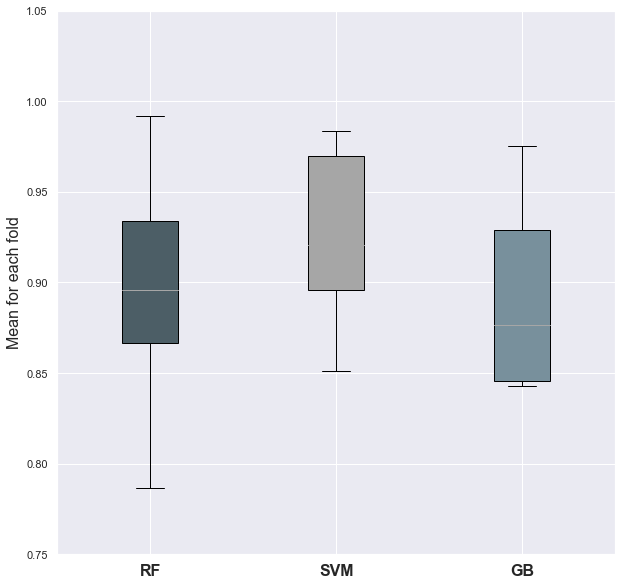

In [412]:
data_to_plot = [eachfoldRF_accuracy, eachfoldSVM_accuracy, eachfoldGB_accuracy]
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bplot = ax.boxplot(data_to_plot, patch_artist=True)

colors=["#4C5E66", "#A6A6A6", "#78909C"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set_ylabel('Mean for each fold', fontsize=16)
plt.xticks([1, 2, 3], ['RF', 'SVM', 'GB'], fontsize=16, fontweight='bold')
plt.ylim(0.75, 1.05)
fig.savefig('plots/acc_metrics.png', bbox_inches='tight')

#### **Recall**

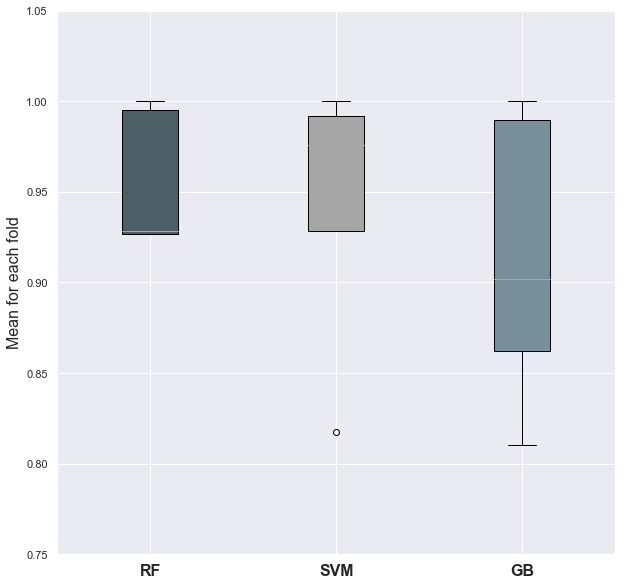

In [413]:
data_to_plot = [eachfoldRF_recall, eachfoldSVM_recall, eachfoldGB_recall]
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bplot = ax.boxplot(data_to_plot, patch_artist=True)

colors=["#4C5E66", "#A6A6A6", "#78909C"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    
ax.set_ylabel('Mean for each fold', fontsize=16)
plt.xticks([1, 2, 3], ['RF', 'SVM', 'GB'], fontsize=16, fontweight='bold')
plt.ylim(0.75, 1.05)
fig.savefig('plots/recall_metrics.png', bbox_inches='tight')

#### **Precision**

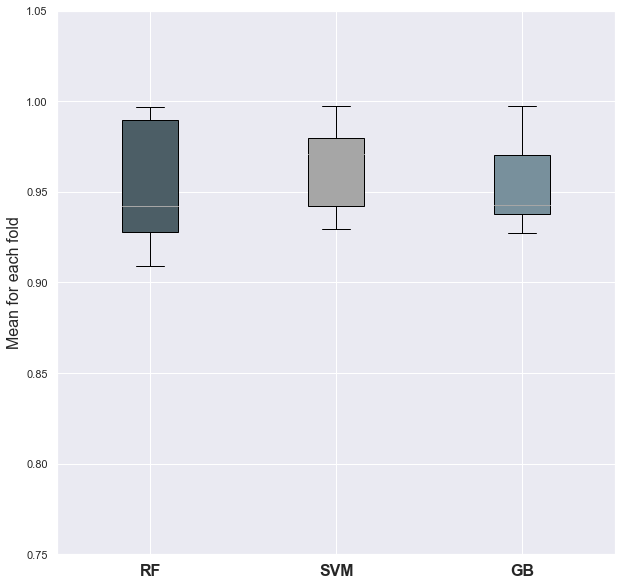

In [414]:
data_to_plot = [eachfoldRF_precision, eachfoldSVM_precision, eachfoldGB_precision]
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bplot = ax.boxplot(data_to_plot, patch_artist=True)

colors=["#4C5E66", "#A6A6A6", "#78909C"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set_ylabel('Mean for each fold', fontsize=16)
plt.xticks([1, 2, 3], ['RF', 'SVM', 'GB'], fontsize=16, fontweight='bold')
plt.ylim(0.75, 1.05)
fig.savefig('plots/precision_metrics.png', bbox_inches='tight')

#### **Area Under the Curve (AUC)**

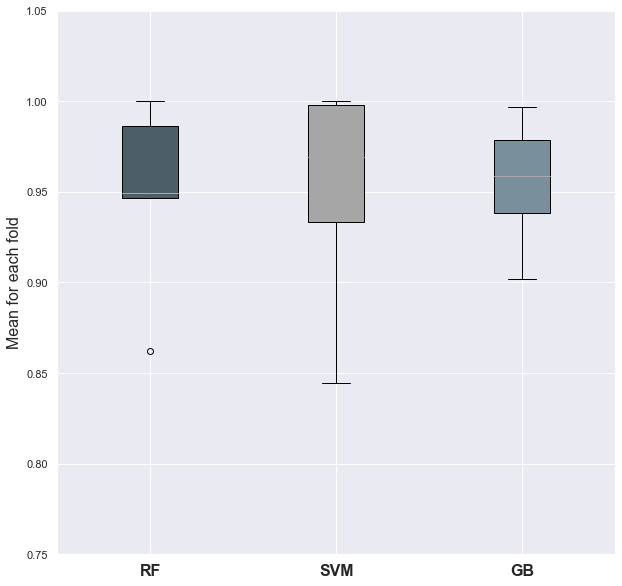

In [418]:
data_to_plot = [eachfoldRF_roc_auc, eachfoldSVM_roc_auc, eachfoldGB_roc_auc]
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bplot = ax.boxplot(data_to_plot, patch_artist=True)

colors=["#4C5E66", "#A6A6A6", "#78909C"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set_ylabel('Mean for each fold', fontsize=16)
plt.xticks([1, 2, 3], ['RF', 'SVM', 'GB'], fontsize=16, fontweight='bold')
plt.ylim(0.75, 1.05)
fig.savefig('plots/AUC_metrics.png', bbox_inches='tight')

In [416]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'Support Vector Machine', 'Gradient Boosting'],
    'Accuracy': [acc_rf, acc_svm, acc_gb],
    'Recall': [recall_rf, recall_svm, recall_gb],
    'Precision': [prec_rf, prec_svm, prec_gb],
    'AUC':[auc_rf, auc_svm, auc_gb]})
models.set_index('Model')

,Accuracy,Recall,Precision,AUC
Model,,,,
Random Forest,0.966881,0.985294,0.974273,0.935997
Support Vector Machine,0.979761,0.986425,0.988662,0.968582
Gradient Boosting,0.980681,0.987557,0.988675,0.969148
